In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scipy.stats as stats
from mlxtend.plotting import plot_decision_regions
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.preprocessing import StandardScaler

## КЛАССИФИКАЦИЯ

Ссылка: https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis

Набор данных об уровне стресса студентов.

Целевая переменная - stress_level.

In [2]:
data = pd.read_csv('StressLevelDataset.csv')
data

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


# Анализ данных

Размер датасета

In [3]:
data.shape

(1100, 21)

Статистическая информация

In [4]:
data.describe(include='all')

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


Информация о наборе данных

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

Датасет содержит 21 столбец, 1100 строк. Все столбцы - числовые, пропусков нет.

Уровни стресса:

In [6]:
data['stress_level'].unique()

array([1, 2, 0])

Проверим кол-во строк для каждого уровня

In [7]:
data['stress_level'].value_counts()

,count
stress_level,
0,373
2,369
1,358


# Визуализация данных





<ipython-input-8-c586d9c14d58>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stress_level', data=data, palette='coolwarm')


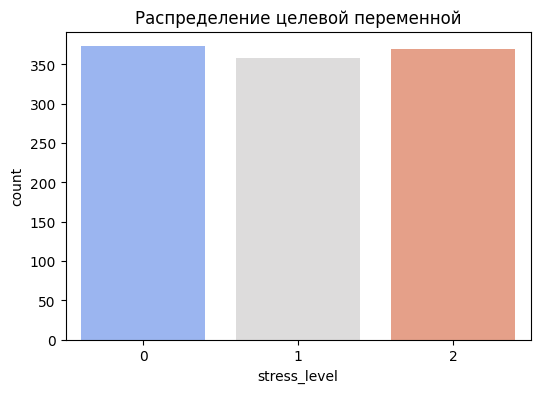

In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='stress_level', data=data, palette='coolwarm')
plt.title('Распределение целевой переменной')
plt.show()

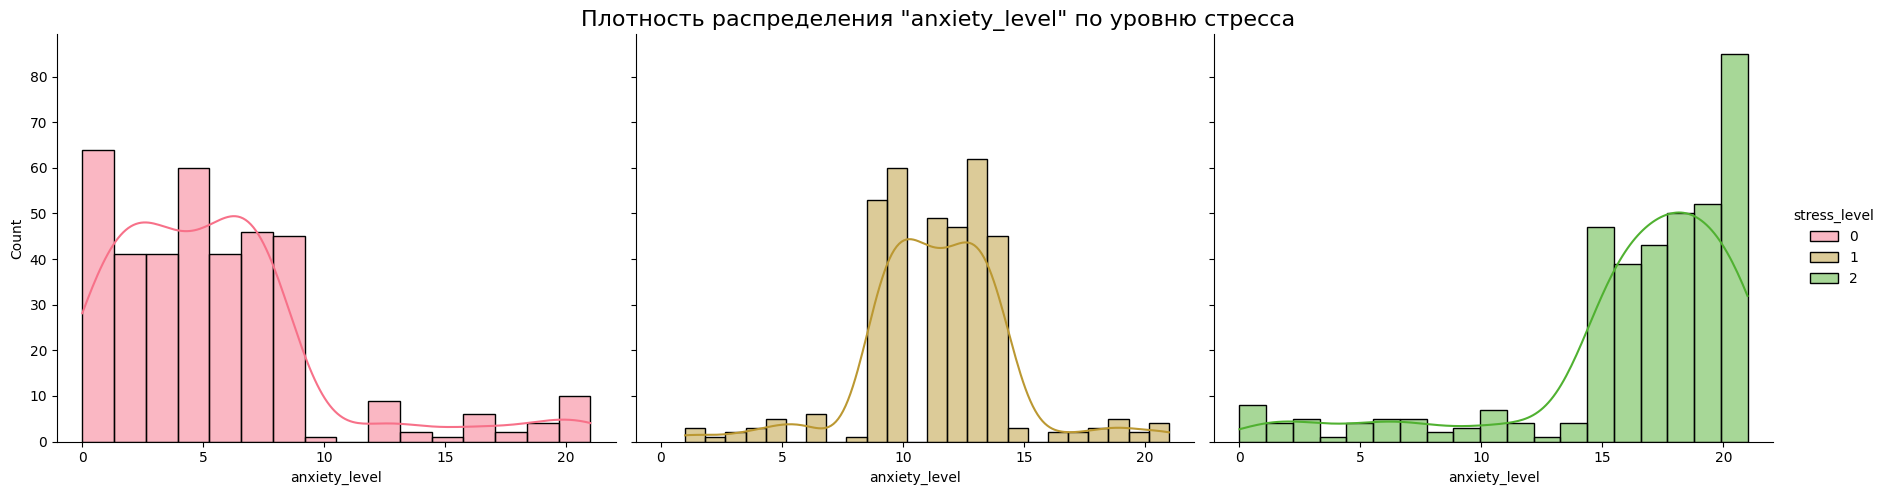

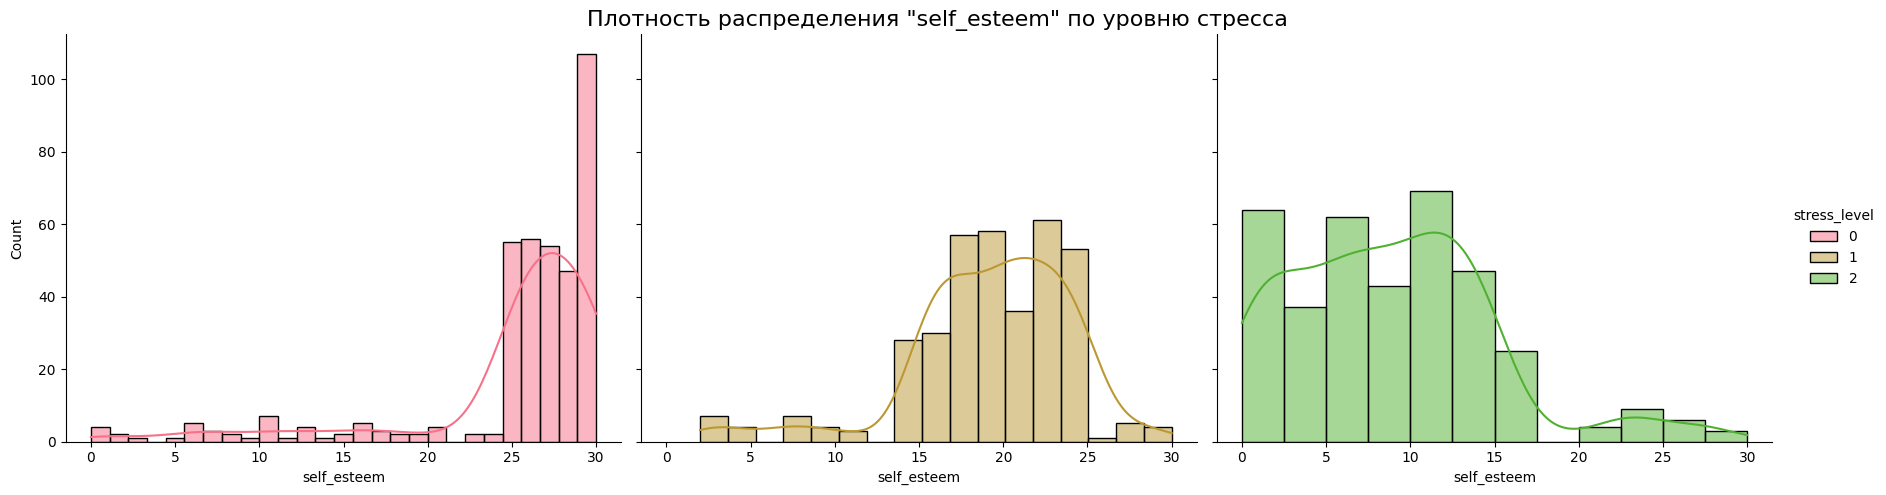

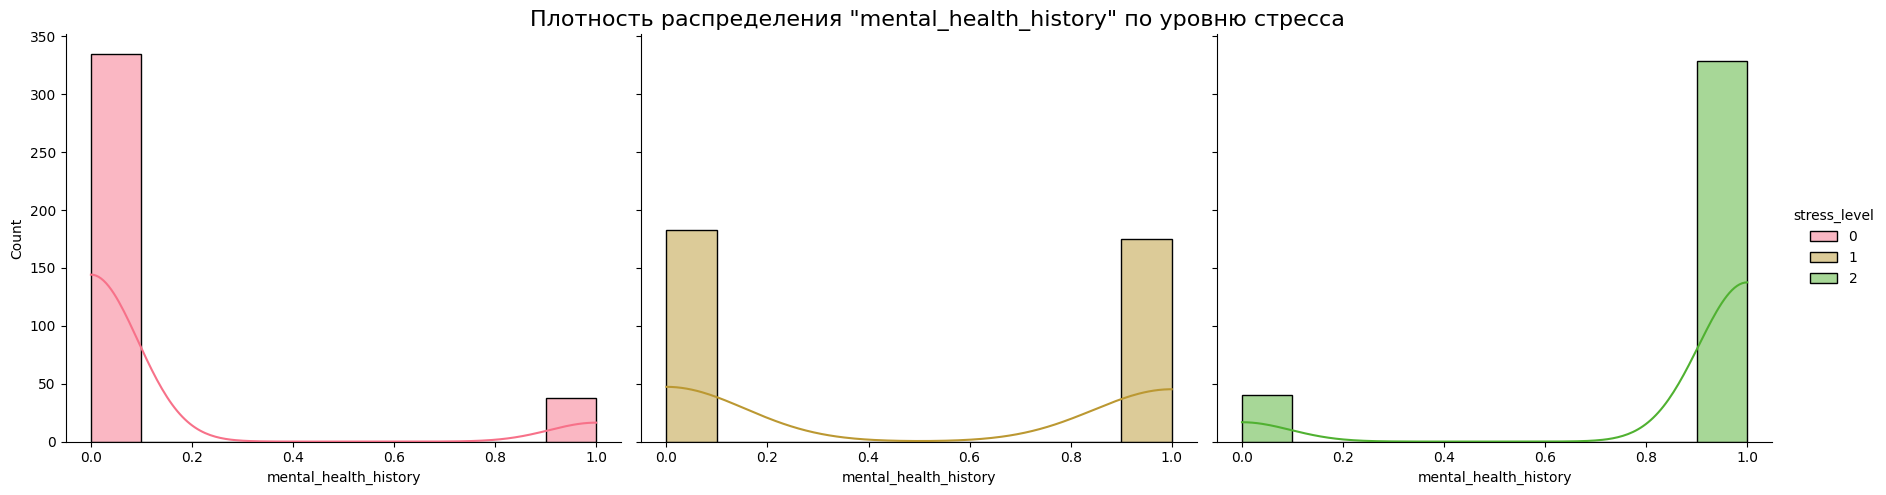

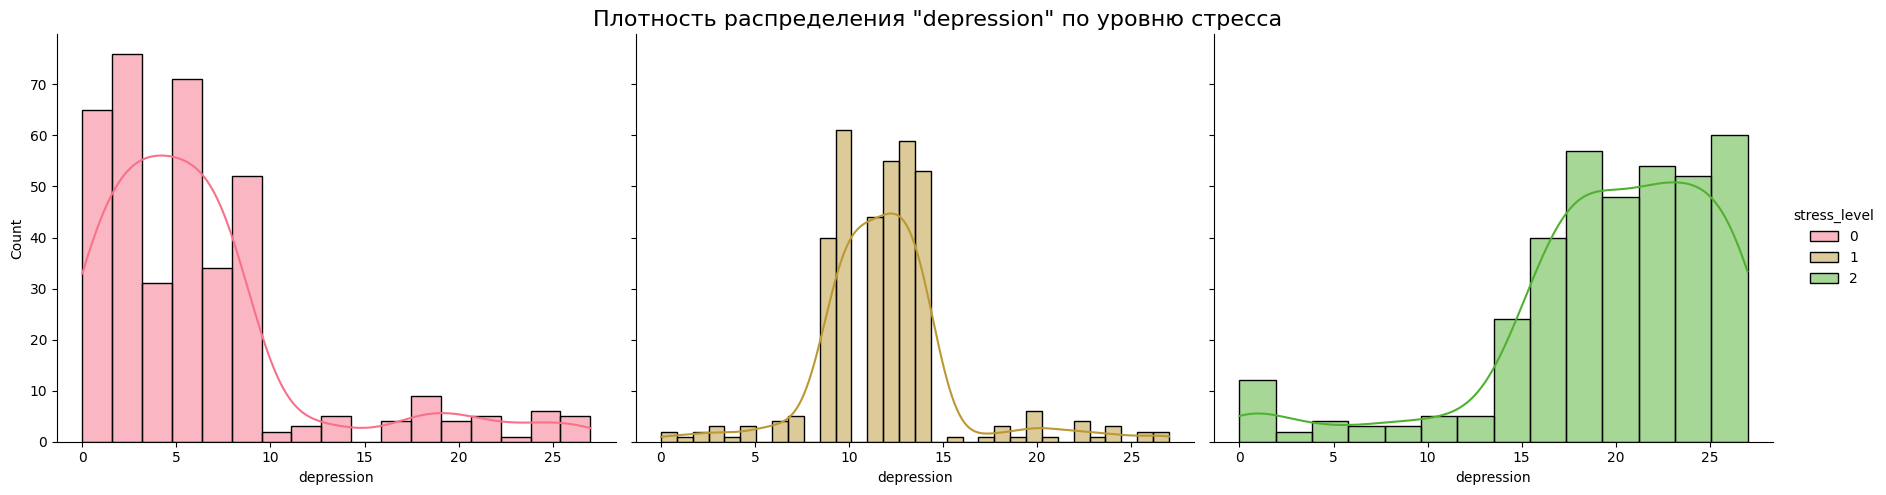

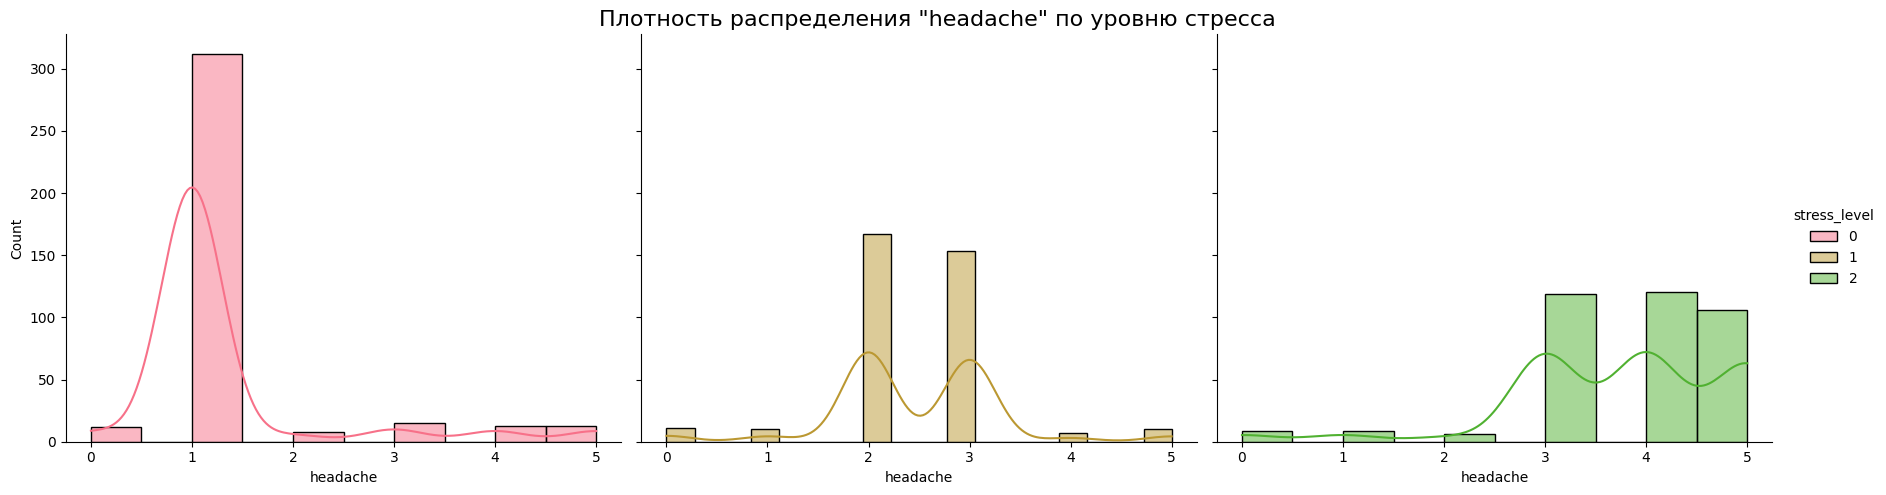

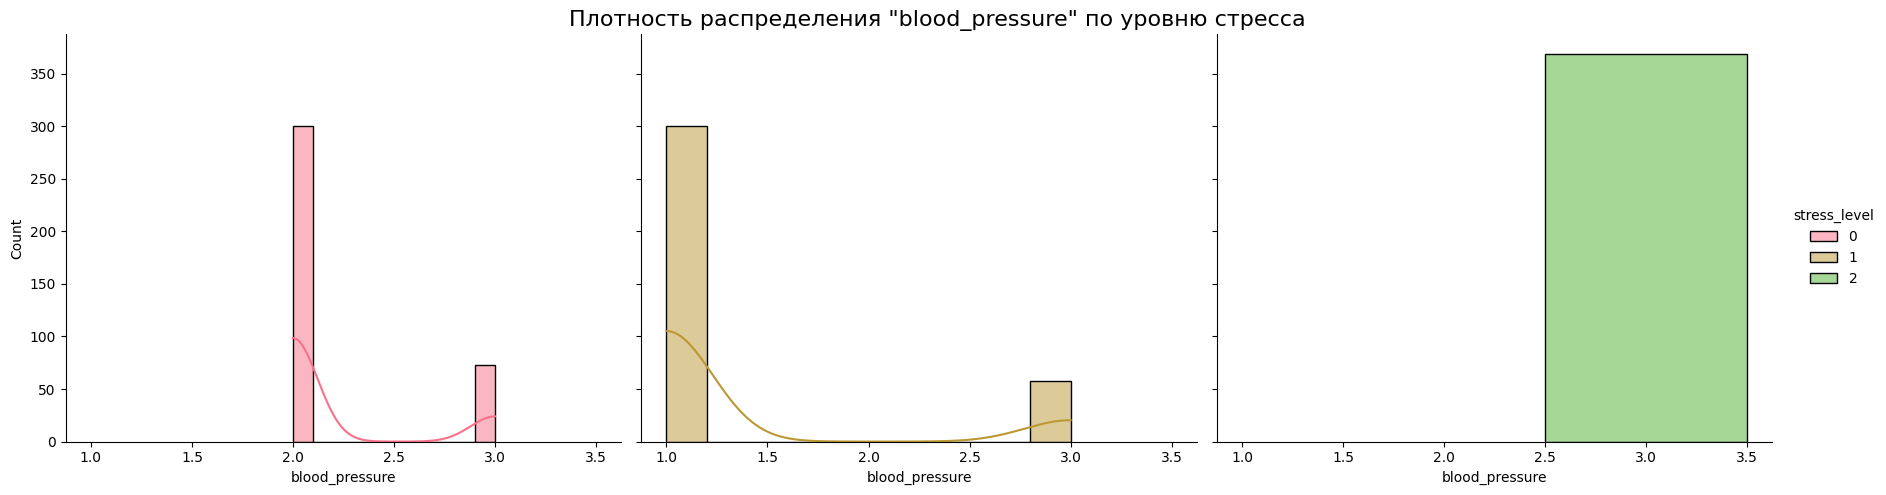

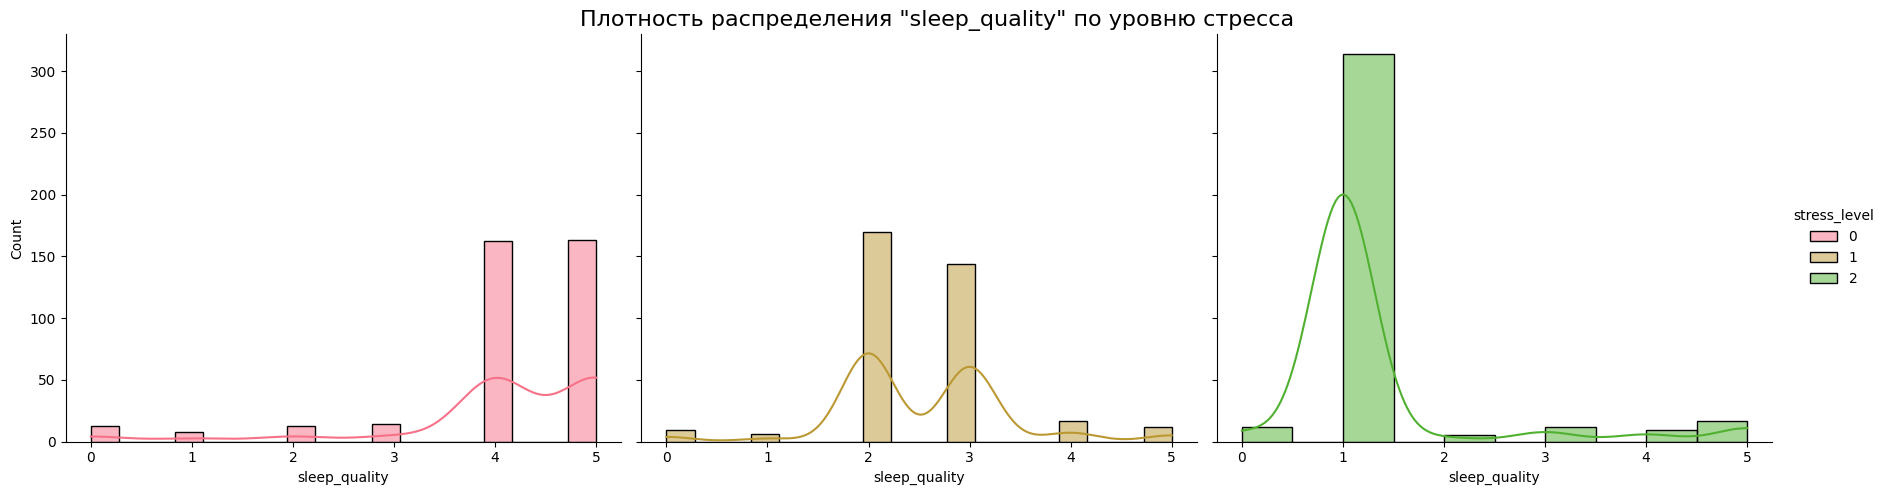

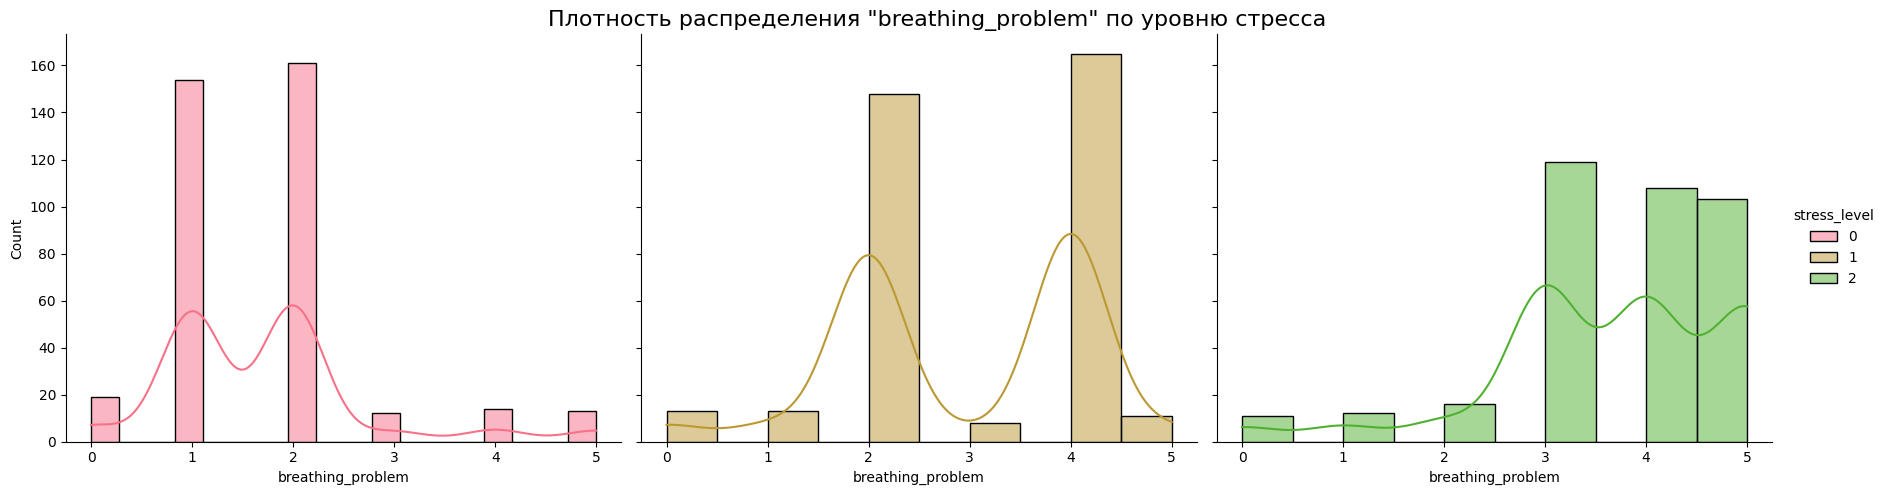

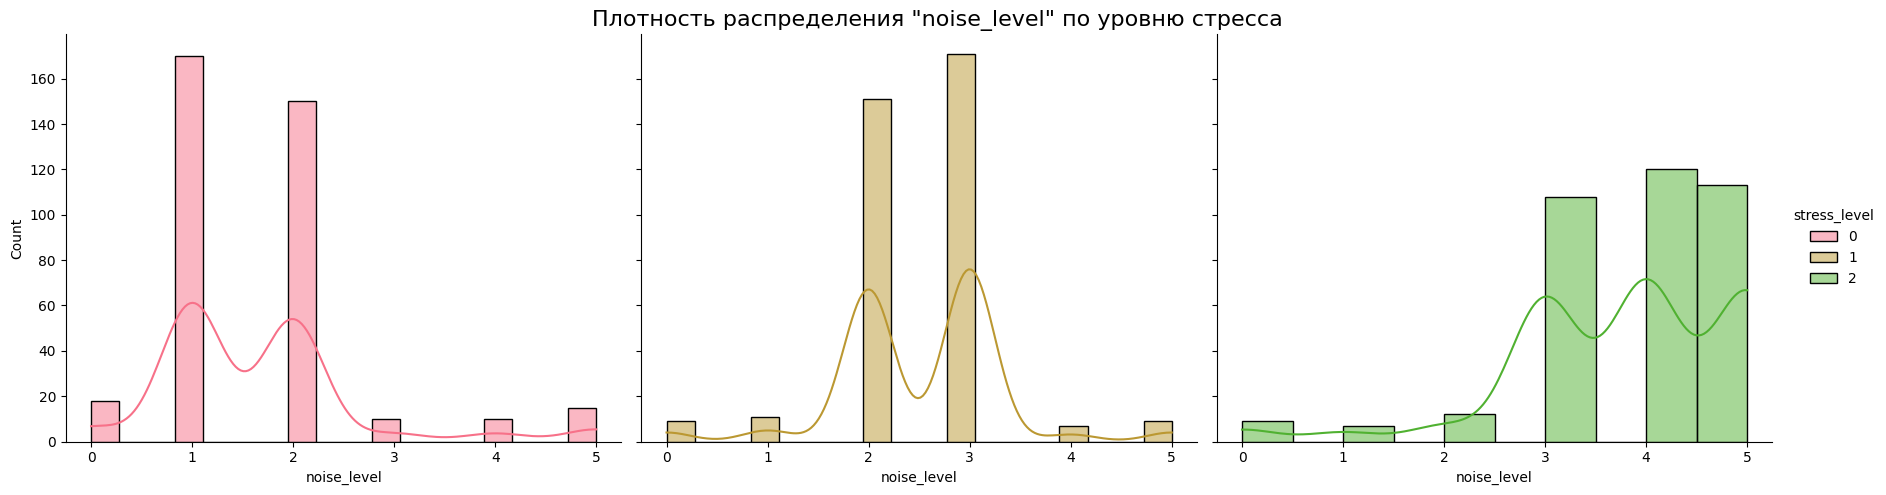

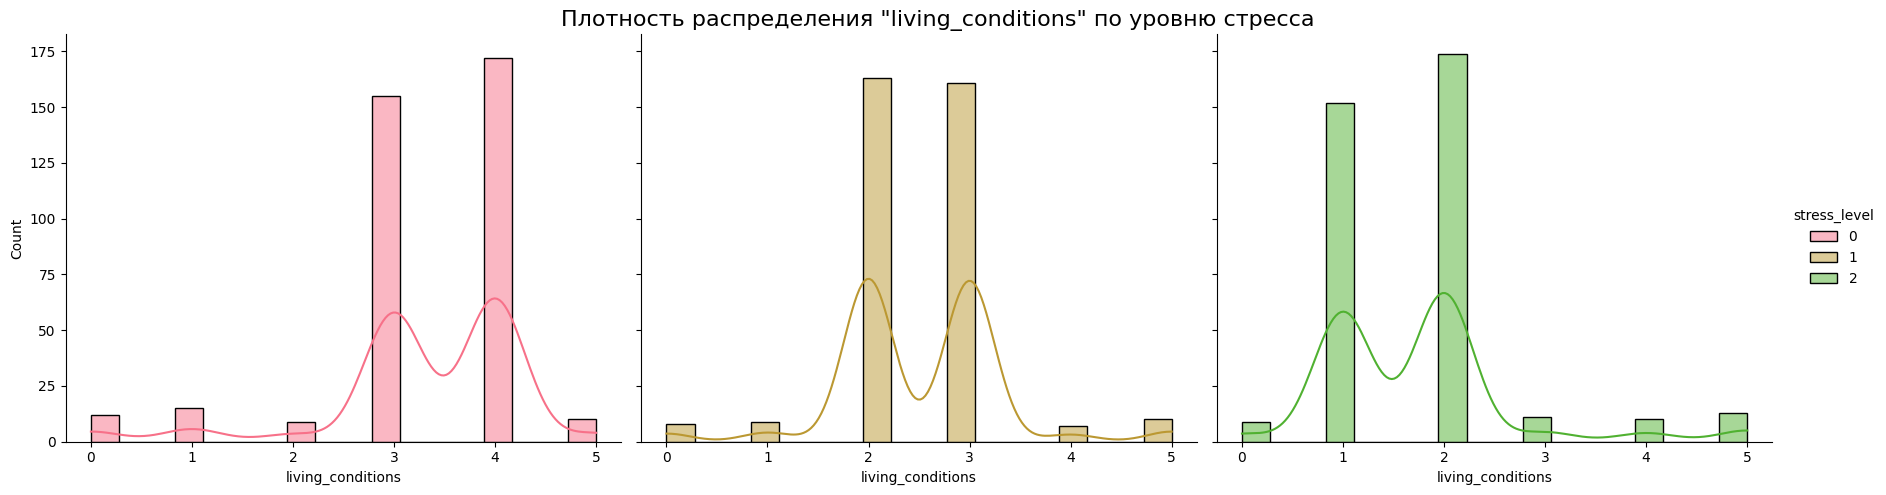

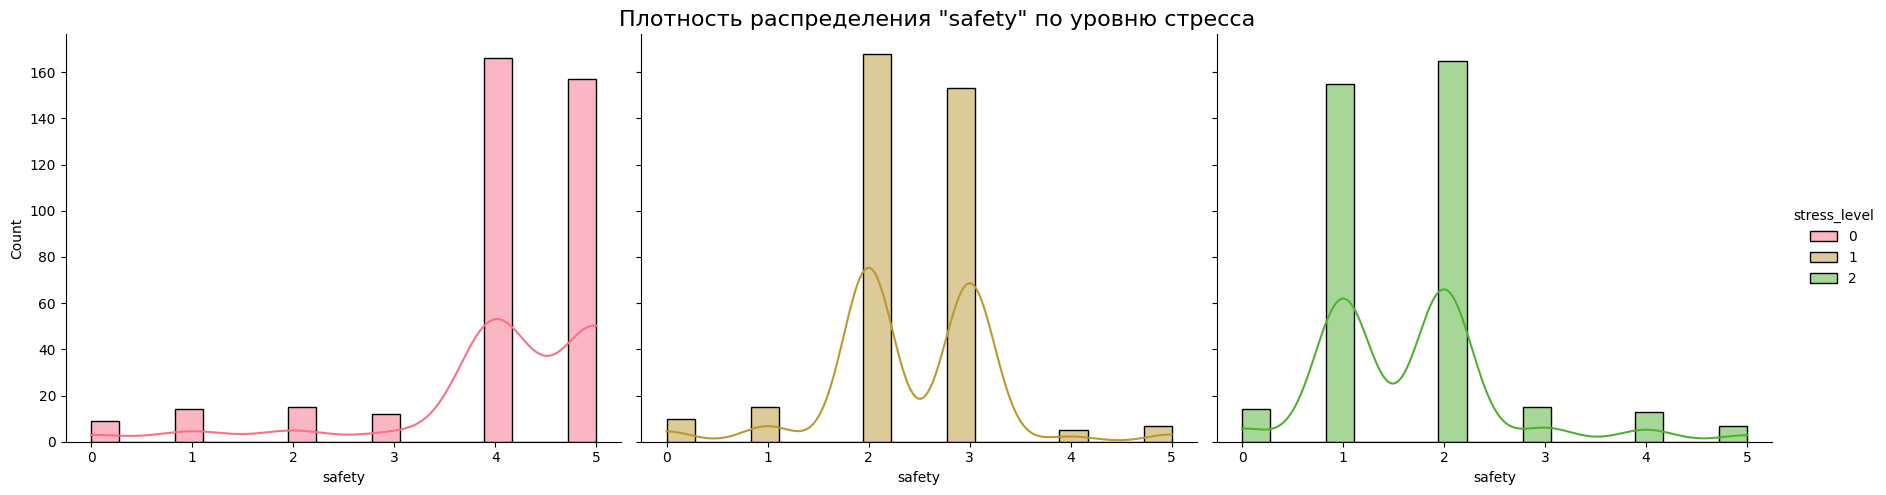

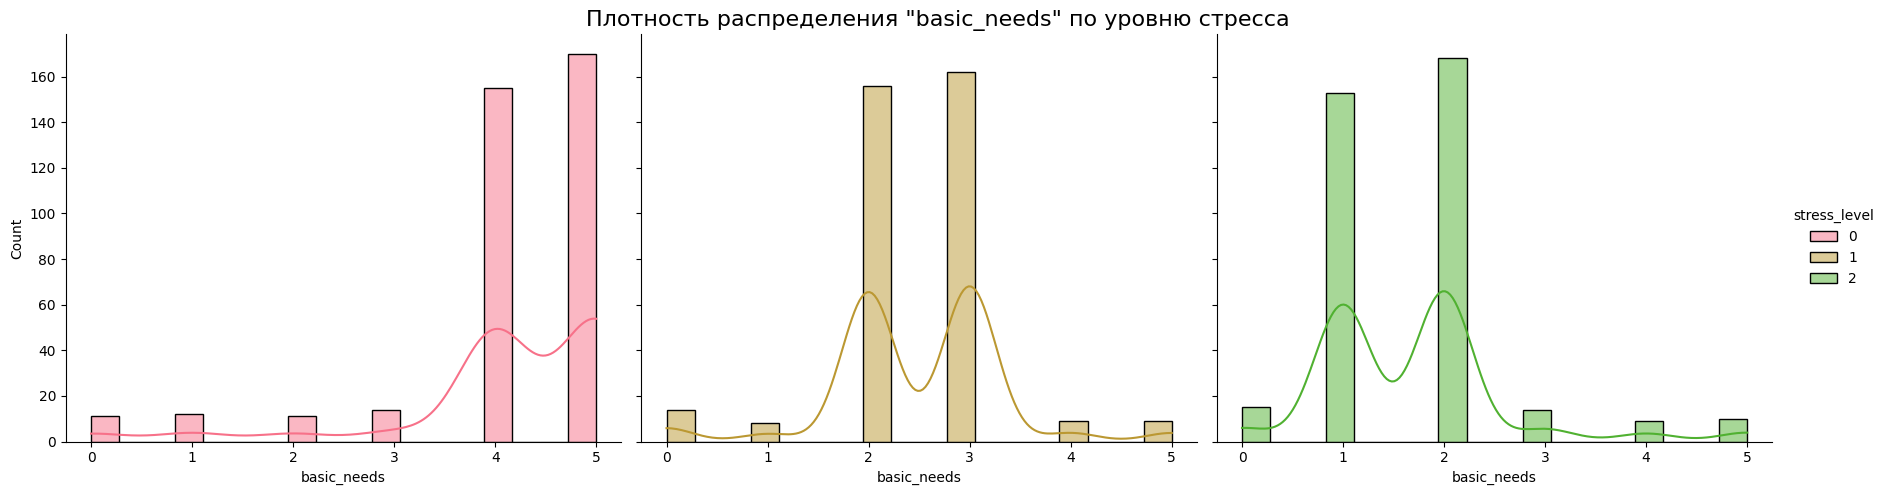

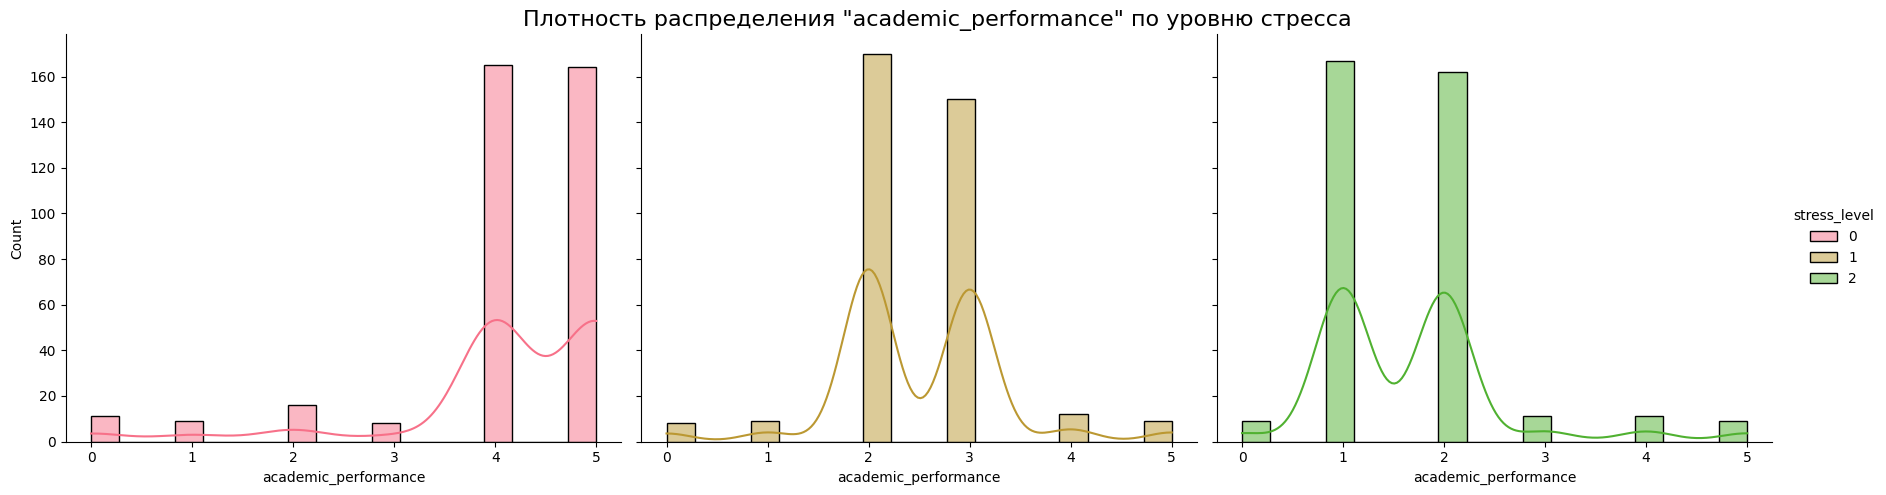

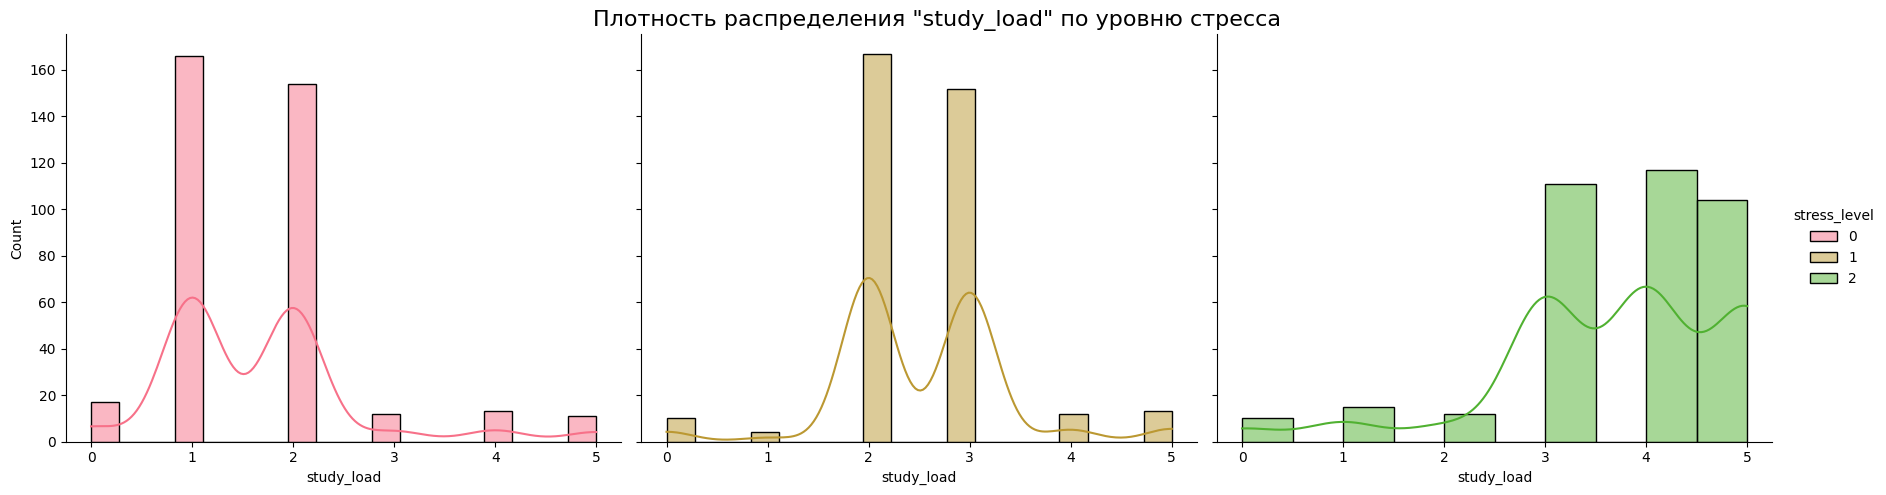

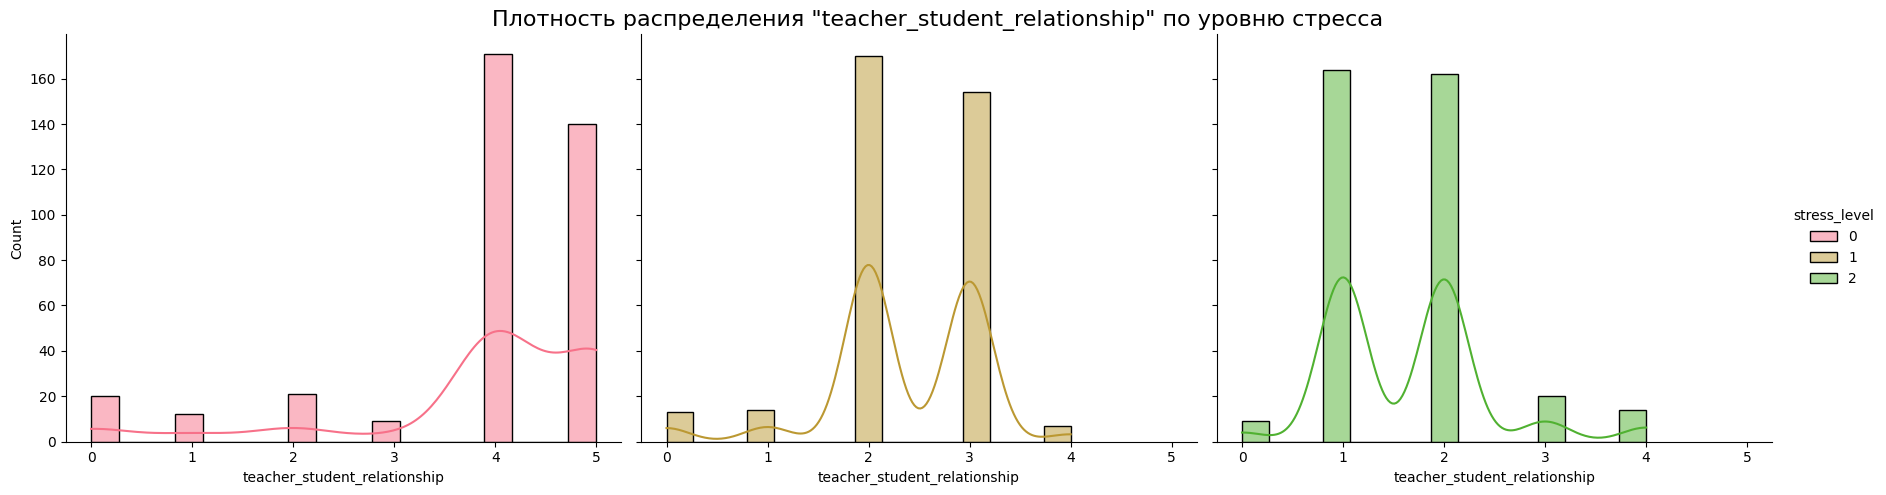

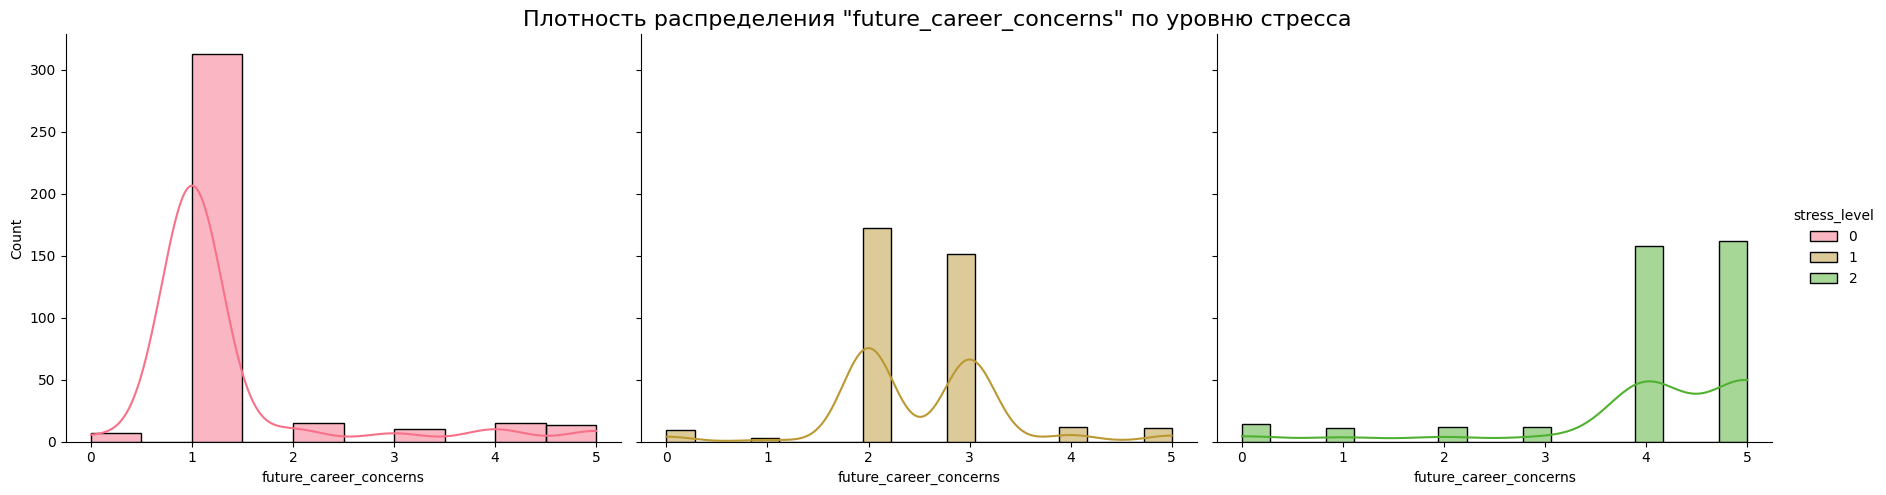

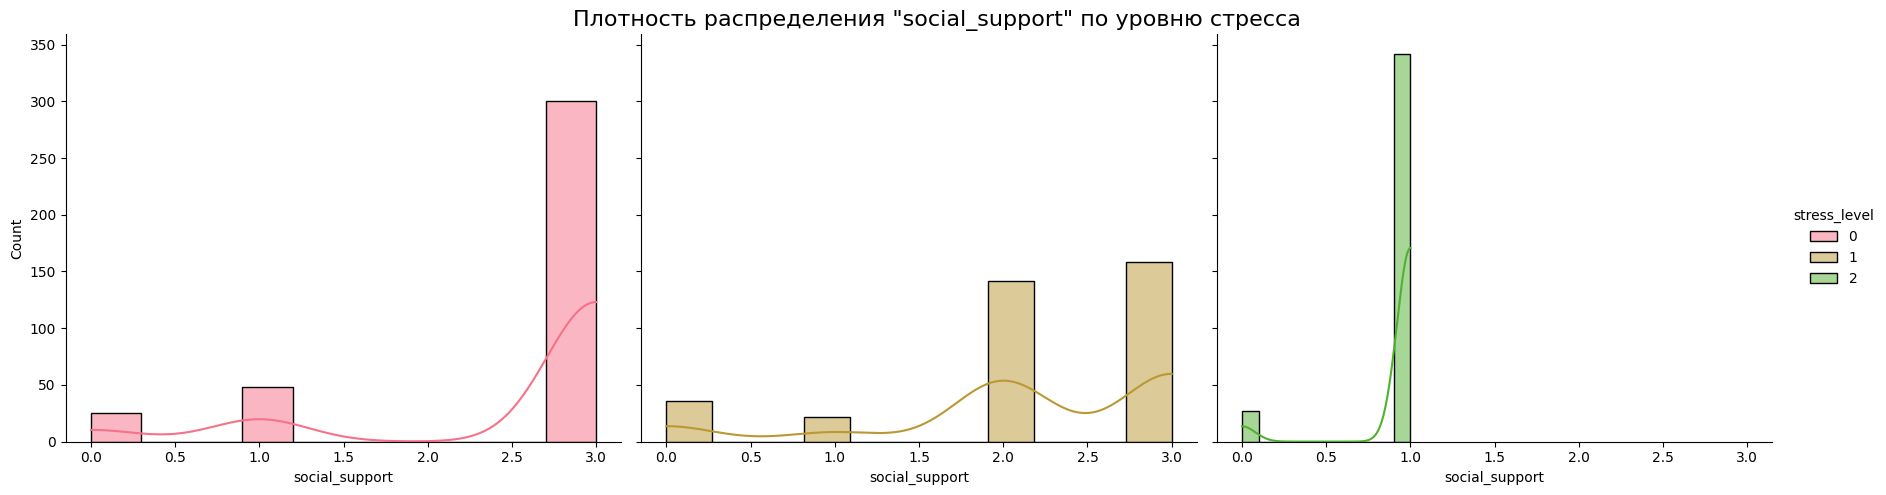

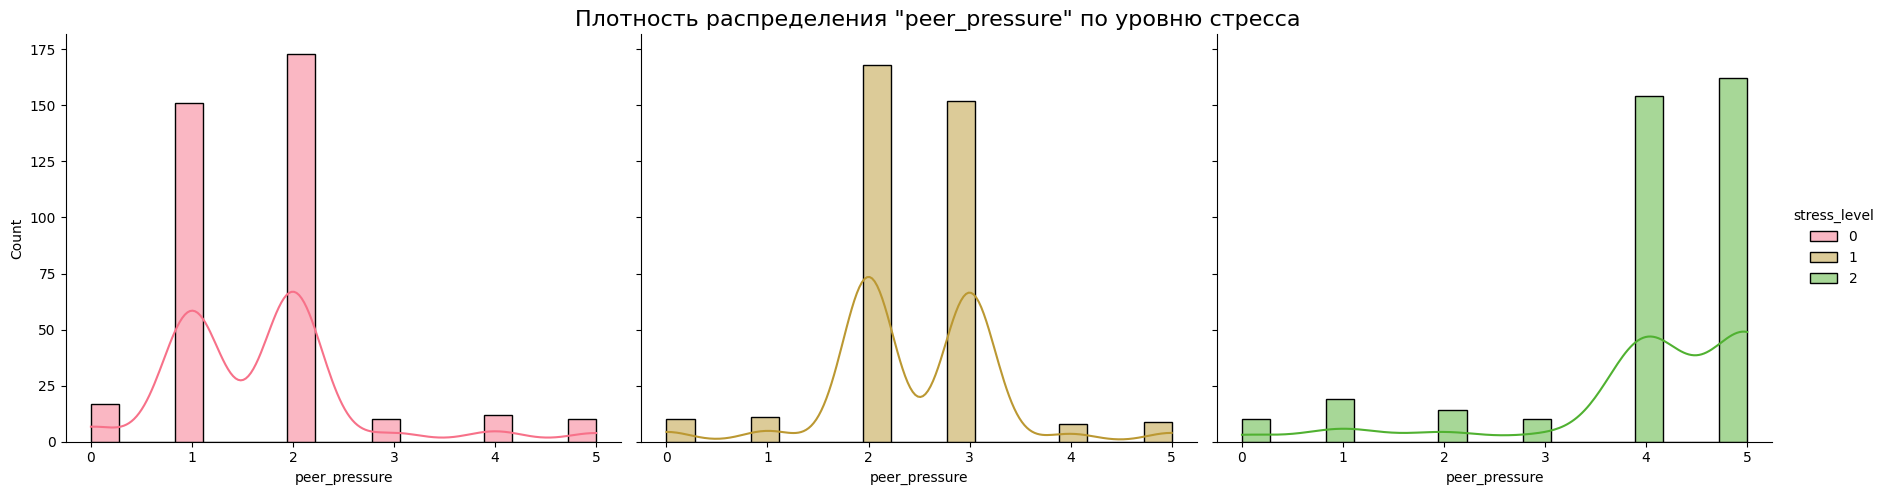

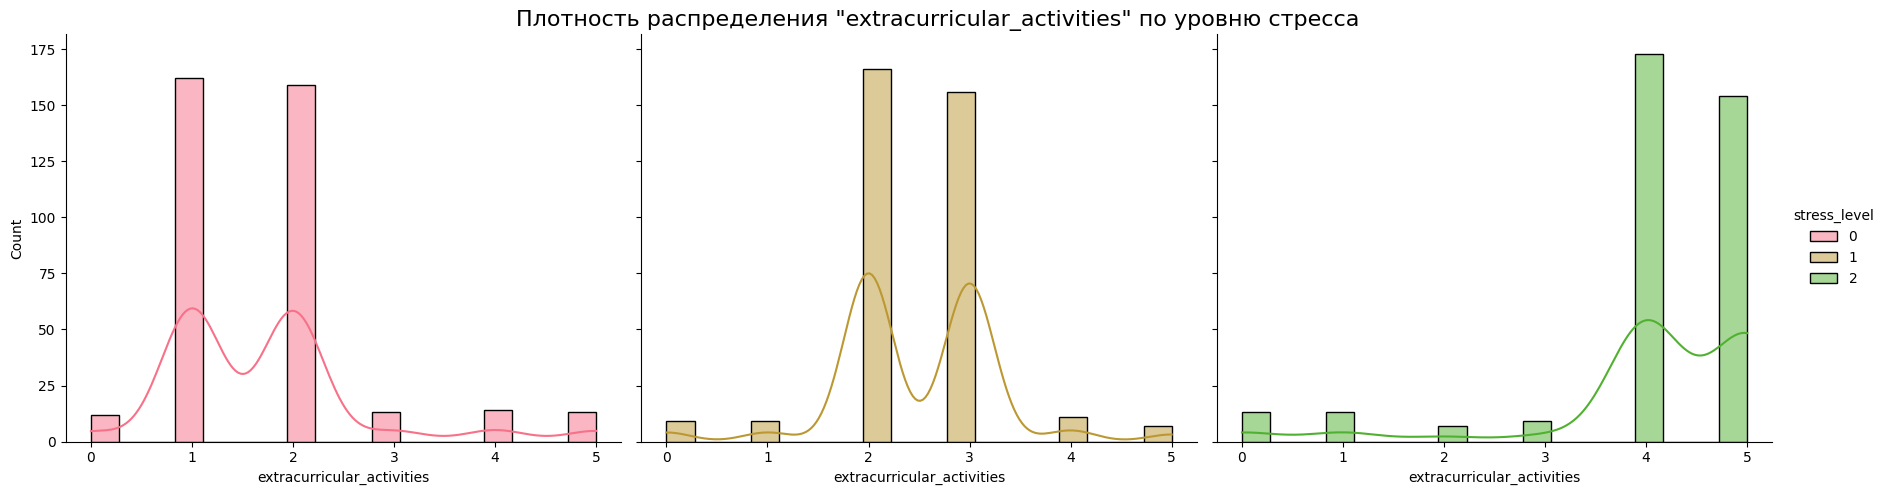

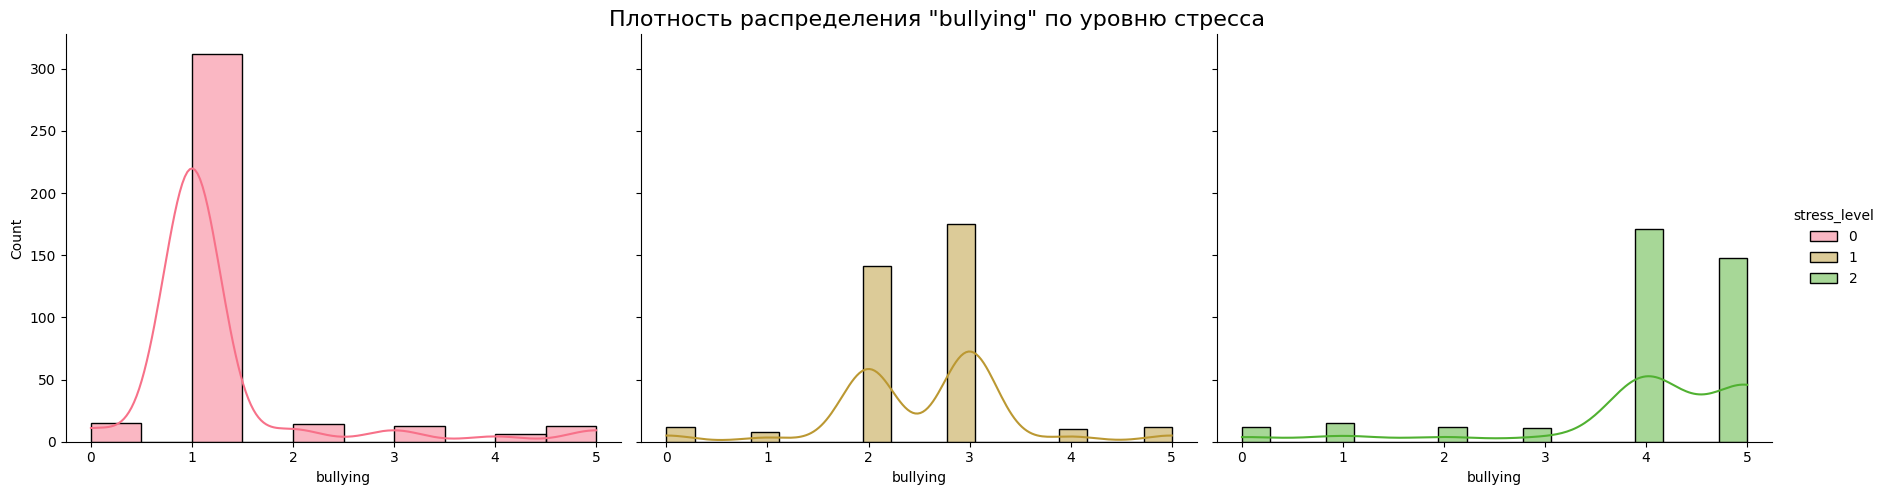

In [9]:
features = [
    'anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying'
]

for feature in features:
    g = sns.FacetGrid(data, col='stress_level', hue='stress_level', height=5, aspect=1.2)
    g.map(sns.histplot, feature, kde=True)
    g.add_legend()
    g.set_titles("")
    g.fig.suptitle(f'Плотность распределения "{feature}" по уровню стресса', fontsize=16)
    plt.show()

Парные графики некоторых параметров

In [11]:
correlation_matrix = data.corr()
correlation_value = correlation_matrix.loc['future_career_concerns', 'bullying']
print(f"Коэффициент корреляции между 'future_career_concerns' и 'bullying': {correlation_value:.3f}")

correlation_value = correlation_matrix.loc['self_esteem', 'bullying']
print(f"Коэффициент корреляции между 'self_esteem' и 'bullying': {correlation_value:.3f}")

correlation_value = correlation_matrix.loc['future_career_concerns', 'self_esteem']
print(f"Коэффициент корреляции между 'future_career_concerns' и 'self_esteem': {correlation_value:.3f}")

Коэффициент корреляции между 'future_career_concerns' и 'bullying': 0.711
Коэффициент корреляции между 'self_esteem' и 'bullying': -0.641
Коэффициент корреляции между 'future_career_concerns' и 'self_esteem': -0.713


<Figure size 1200x1000 with 0 Axes>

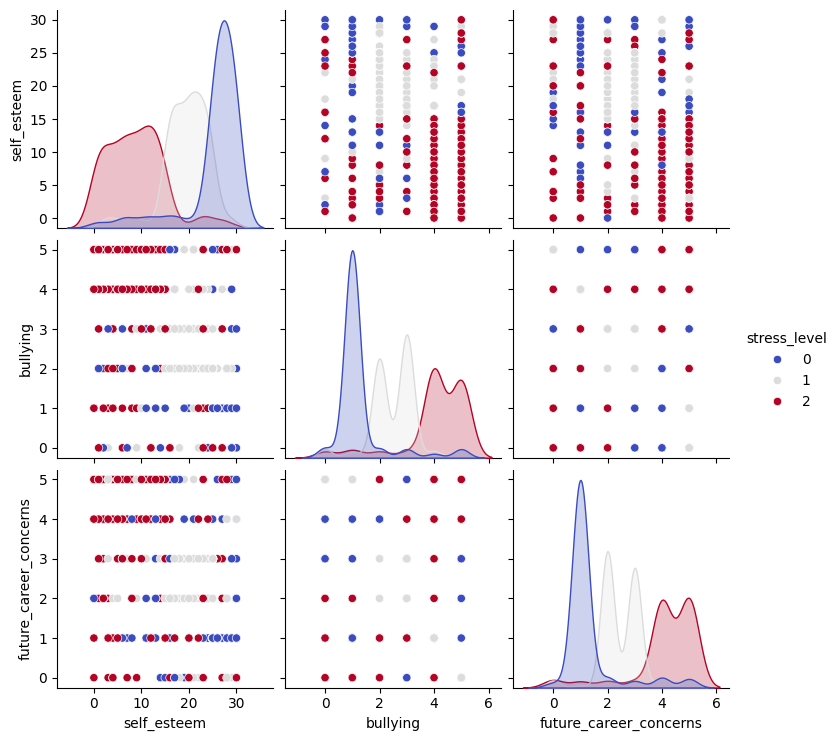

In [12]:
plt.figure(figsize=(12, 10))
sns.pairplot(data[['self_esteem', 'bullying', 'future_career_concerns', 'stress_level']], hue='stress_level', palette='coolwarm')
plt.show()

Графики показывают, что точки с разными уровнями стресса имеют разные распределения в пространстве признаков.

Графики оказывают сложные взаимосвязи между тремя переменными: future_career_concerns, bullying, и self_esteem. Несмотря на то, что диаграммы сами по себе не демонстрируют явных линейных зависимостей (точки сильно рассеяны), коэффициенты корреляции указывают на значительные связи.

Корелляционная матрица

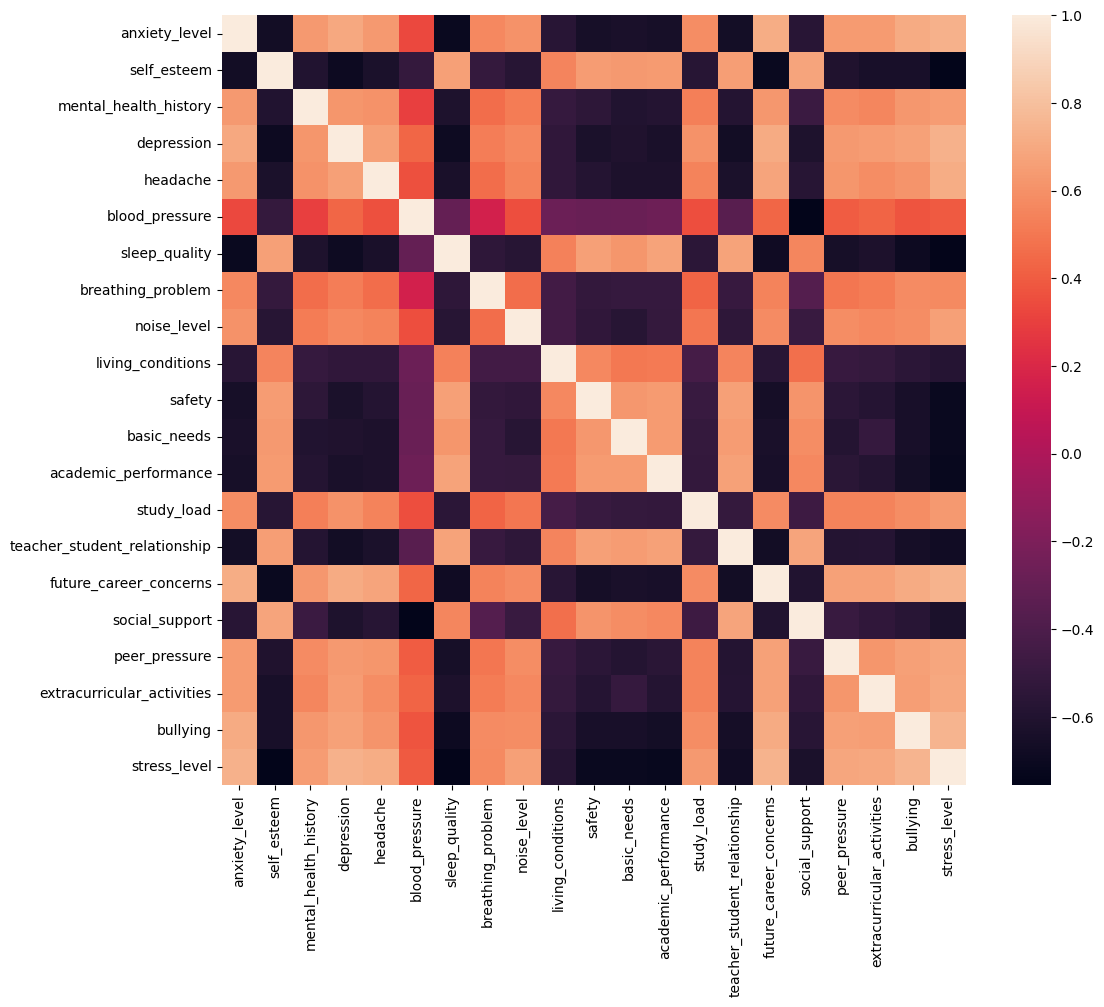

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True))
plt.show()

# Построение модели

Разобьем датасет на:

Y - целевая переменная, которую предсказываем (stress_level).

X - весь набор данных без целевой переменной.

In [15]:
X = data.drop(['stress_level'], axis=1)
y = data['stress_level']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (1100, 20) | y shape: (1100,) 


Стандартизация данных

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train Test разделение (80/20)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=17, stratify=y)

stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=-0.07335643066072974, pvalue=0.9415358481143774, df=1098.0)

Обучение и выбор оптимальной модели

Logistic Regression (LR)

Linear Discriminant Analysis (LDA)

K-Nearest Neighbors (KNN)

Classification and Regression Trees (CART)

Gaussian Naive Bayes (NB)

Support Vector Machines (SVM)

In [18]:
models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.878409 (0.031757)
LDA: 0.879545 (0.034167)
KNN: 0.863636 (0.020328)
CART: 0.882955 (0.031348)
NB: 0.884091 (0.028204)
SVC: 0.867045 (0.030933)


По показателям лучшей моделью является Gaussian Naive Bayes (NB).

Обучение конкретной модели

In [19]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred_res = nb_model.predict(X_test)

nb_accuracy = accuracy_score(y_test, nb_pred_res)
nb_probabilities = nb_model.predict_proba(X_train)

print(f'NB accuracy: {nb_accuracy}')
print(f'NB prediction: {nb_pred_res}')
print('NB probabilities for the first 5 training samples:', nb_probabilities[:5], sep='\n')

NB accuracy: 0.8818181818181818
NB prediction: [0 1 2 2 1 0 0 2 1 2 2 2 0 2 1 2 1 0 0 2 2 1 1 0 2 2 0 2 1 1 2 0 2 0 1 1 1
 1 2 2 1 2 0 0 1 0 0 0 0 2 2 2 1 2 0 1 2 0 2 2 0 2 0 1 0 0 2 1 1 0 2 2 1 0
 1 1 1 2 0 0 1 2 2 0 1 2 1 1 2 2 2 2 1 0 0 0 2 1 0 0 1 0 0 2 1 2 0 1 0 0 2
 2 1 2 2 2 1 1 1 1 2 2 0 0 1 0 2 1 2 1 2 0 2 0 1 2 0 0 0 0 2 1 2 1 2 2 2 2
 1 1 1 2 1 2 1 2 1 2 1 2 0 0 0 0 2 2 2 0 2 1 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2
 1 2 2 0 0 0 2 2 2 0 0 2 1 2 0 2 0 2 0 2 1 2 1 1 2 2 2 0 1 0 0 0 2 1 0]
NB probabilities for the first 5 training samples:
[[1.56533891e-10 1.00000000e+00 0.00000000e+00]
 [1.00000000e+00 3.41347327e-18 0.00000000e+00]
 [7.89337293e-10 9.99999999e-01 0.00000000e+00]
 [2.93127133e-11 1.00000000e+00 0.00000000e+00]
 [1.13595026e-07 9.99999886e-01 0.00000000e+00]]


Точность Gaussian Naive Bayes (NB) около 88%

Визуализация решения

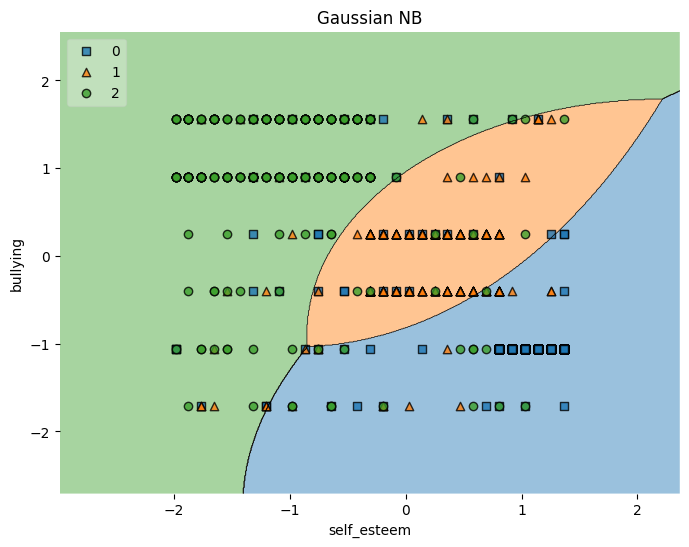

In [30]:
X = data[['self_esteem', 'bullying']]
y = data['stress_level'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

nb_model1 = GaussianNB()
nb_model1.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plt.title('Gaussian NB (train)')
plot_decision_regions(X=X_train, y=y_train, clf=nb_model1, legend=2)
plt.show()

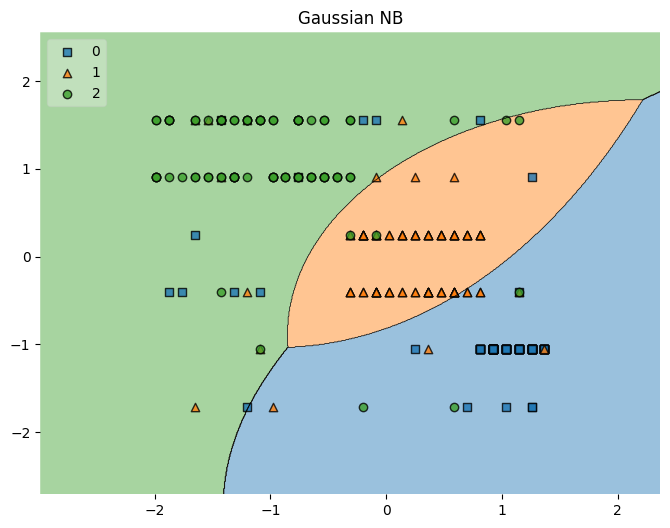

In [31]:
nb_model2 = GaussianNB()
nb_model2.fit(X_train, y_train)

plt.figure(figsize=(8, 6))
plt.title('Gaussian NB (test)')
plot_decision_regions(X=X_test, y=y_test, clf=nb_model2, legend=2)
plt.show()

Точки, относящиеся к разным классам, разделены границей, хоть и некоторые значения попадают в другой уровень стресса.

In [32]:
predicted = nb_model2.predict(X_test)

# Метрики
accuracy = metrics.accuracy_score(y_test, predicted)
recall = metrics.recall_score(y_test, predicted, average="weighted")
precision = metrics.precision_score(y_test, predicted, average="weighted")

print("Accuracy:", round(accuracy, 2))
print("Recall (all 1s predicted right):", round(recall, 2))
print("Precision (confidence when predicting a 1):", round(precision, 2))
print("Detail:")
print(metrics.classification_report(y_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Accuracy: 0.87
Recall (all 1s predicted right): 0.87
Precision (confidence when predicting a 1): 0.88
Detail:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88        94
           1       0.94      0.82      0.88        95
           2       0.80      0.92      0.85        86

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.88      0.87      0.87       275



Значения метрик указывают на то, что обученная модель работает хорошо.